In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
fct_invoice_df = pd.read_csv('fct_invoice.csv')
dim_customer_df = pd.read_json('dim_customer.json')

In [27]:
fct_invoice_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [28]:
dim_customer_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [29]:
#Easy 1: How mnay Unique Customers are in the Data Set
print(dim_customer_df["id"].nunique())

5191


In [30]:
#Easy 2: What are the different categories of products available? How many unique categories are there?
print(fct_invoice_df["category"].unique())
print(fct_invoice_df["category"].nunique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [31]:
#Easy 3: Which payment method is the most popular? How many times was it used?
print(fct_invoice_df["payment_method"].mode())

0    Cash
Name: payment_method, dtype: object


In [32]:
#Easy 3: Which payment method is the most popular? How many times was it used?
print(fct_invoice_df["payment_method"].value_counts()["Cash"])

44447


In [33]:
#Medium 1: What are the three most popular categories, by total sales?
fct_invoice_df["sales"]=fct_invoice_df["price"]*fct_invoice_df["quantity"]
Categories_Ranked = fct_invoice_df.groupby(['category']).sum().sort_values('sales', ascending = False).head(3)

Categories_Ranked

C:\Users\Acer Nitro\AppData\Local\Temp\ipykernel_29220\4211091849.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Categories_Ranked = fct_invoice_df.groupby(['category']).sum().sort_values('sales', ascending = False).head(3)


,customer_id,quantity,price,sales
category,,,,
Clothing,34578159,103558,31075684.64,1.139968e+08
Shoes,9901187,30217,18135336.89,6.655345e+07
Technology,5069499,15021,15772050.00,5.786235e+07


In [34]:
#Medium 2: What are the total sales attributed to customers over the age of 45?
invoice_customer_df = fct_invoice_df.merge(dim_customer_df, left_on = "customer_id", right_on = "id")
invoice_customer_df["sales"] = invoice_customer_df["price"]*invoice_customer_df["quantity"]
invoice_customer_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez


In [35]:
#Medium 2: What are the total sales attributed to customers over the age of 45?
Sales_over_45 = invoice_customer_df[invoice_customer_df['age'] > 45].sum()['sales']
Sales_over_45

82039768.15

In [36]:
#Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

fct_invoice_df['invoice_date'] = pd.to_datetime(fct_invoice_df['invoice_date'])
fct_invoice_df['year'] = fct_invoice_df['invoice_date'].dt.year
fct_invoice_df['2023'] = 2023

updated_df = fct_invoice_df[fct_invoice_df['year'] == 2023]

updated_df

C:\Users\Acer Nitro\AppData\Local\Temp\ipykernel_29220\493407465.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  fct_invoice_df['invoice_date'] = pd.to_datetime(fct_invoice_df['invoice_date'])


,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,year,2023
19,I992454,562,Toys,4,143.36,Cash,2023-07-03,Cevahir AVM,573.44,2023,2023
20,I183746,3047,Clothing,1,300.08,Credit Card,2023-02-15,Emaar Square Mall,300.08,2023,2023
35,I339732,3230,Food & Beverage,1,5.23,Credit Card,2023-04-01,Emaar Square Mall,5.23,2023,2023
46,I267193,187,Cosmetics,3,121.98,Credit Card,2023-12-01,Mall of Istanbul,365.94,2023,2023
51,I202367,1018,Books,3,45.45,Cash,2023-02-24,Istinye Park,136.35,2023,2023
...,...,...,...,...,...,...,...,...,...,...,...
99429,I208840,358,Toys,1,35.84,Credit Card,2023-02-18,Istinye Park,35.84,2023,2023
99441,I203187,154,Food & Beverage,4,20.92,Cash,2023-02-03,Zorlu Center,83.68,2023,2023
99446,I327966,1040,Food & Beverage,1,5.23,Cash,2023-05-02,Metropol AVM,5.23,2023,2023
99449,I134399,44,Clothing,1,300.08,Cash,2023-01-01,Kanyon,300.08,2023,2023


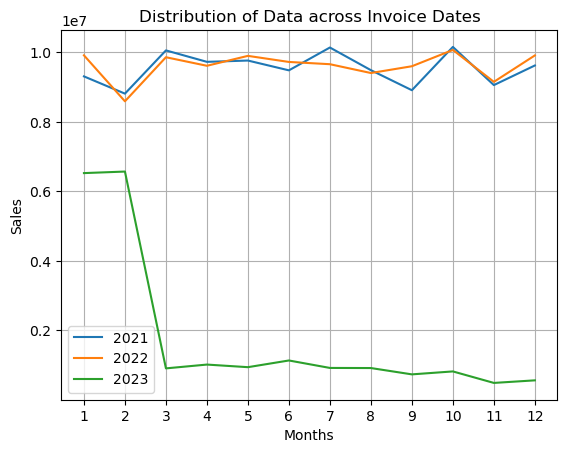

In [37]:
#Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
fct_invoice_df['invoice_date'] = pd.to_datetime(fct_invoice_df['invoice_date'])


fct_invoice_df['year'] = fct_invoice_df['invoice_date'].dt.year 
fct_invoice_df['month'] = fct_invoice_df['invoice_date'].dt.month


monthly_sales = fct_invoice_df.groupby(['year', 'month'])['sales'].sum().unstack().fillna(0)


fig, ax = plt.subplots() 


for year in [2021, 2022, 2023]:
    ax.plot(range(1, 13), monthly_sales.loc[year], label=str(year))

plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Distribution of Data across Invoice Dates')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()


In [40]:
#Hard 1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

# Assuming you have a DataFrame called 'df' with a column 'Score'
# For example, you have a DataFrame like this:
# df = pd.DataFrame({'Score': [90, 85, 95, 78, 88, 80, 70, 92, 84, 79]})

# Define custom bins and corresponding labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [f'{start}-{end-1}' for start, end in zip(bins, bins[1:])]

# Create a new column 'Class' in the DataFrame based on 'Score' column and custom bins/labels
invoice_customer_df['Age Class'] = pd.cut(invoice_customer_df['age'], bins, labels=labels)

invoice_customer_df


,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,sales,age,first_name,gender,id,last_name,Age Class
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,NaN,William,M,229,Anderson,NaN
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,162.64,NaN,William,M,229,Anderson,NaN
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,5401.53,NaN,William,M,229,Anderson,NaN
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,2700.72,NaN,William,M,229,Anderson,NaN
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,15004.25,NaN,William,M,229,Anderson,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,600.17,NaN,Melissa,F,4973,Bell,NaN
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,378.75,36.0,Leslie,F,6161,Bass,30-39
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,7502.00,NaN,Kelly,F,6779,Roberts,NaN
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,1200.32,47.0,Shawn,M,8386,Perez,40-49


In [41]:
pivot_table =invoice_customer_df.pivot_table(index='Age Class', columns='category', values='sales', aggfunc='sum')
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
Age Class,,,,,,,,
0-9,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
10-19,19891.95,3029007.52,178009.48,20433.61,1367187.26,20128.68,1772400.0,98273.28
20-29,80128.35,10079987.28,594733.82,74271.23,6152942.84,53570.91,5049450.0,380011.52
30-39,84446.10,11516170.16,722406.22,89187.19,7178633.37,63705.63,6231750.0,426460.16
40-49,82946.25,10933114.72,656740.32,85034.57,6775319.13,65007.66,5840100.0,378864.64
50-59,79537.50,10819684.48,621366.12,77686.42,6268175.48,57594.30,4662000.0,357002.24
60-69,76234.80,10004067.04,599735.00,76127.88,5499357.71,51482.97,5218500.0,340659.20
70-79,56251.95,7871098.40,427824.52,55584.44,4718536.54,38439.21,3773700.0,285608.96
80-89,21103.95,3739897.04,214684.80,25334.12,2125201.97,20234.25,1449000.0,126336.00
